# Análise Exploratória de Dados - Titanic

Autor: Cleberson Flores  
Curso: Introdução ao Data Science  
Ano: 2026


## Objetivo

Realizar uma Análise Exploratória de Dados (AED) utilizando a base pública do Titanic, com o objetivo de compreender a estrutura do dataset, tratar possíveis inconsistências, analisar variáveis relevantes e identificar padrões associados à sobrevivência dos passageiros.


In [125]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

sns.set(style="whitegrid")

print("Todas as bibliotecas necessárias foram importadas com sucesso.")


Todas as bibliotecas necessárias foram importadas com sucesso.


In [126]:
df = pd.read_csv("titanic.csv")

print("Arquivo CSV carregado e dataframe criado com sucesso.")

Arquivo CSV carregado e dataframe criado com sucesso.


In [127]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [128]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
# Preencher a coluna 'Age' com a mediana
df["Age"] = df["Age"].fillna(df["Age"].median())

# Preencher a coluna 'Embarked' com a moda
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

print("Tratamento de valores nulos concluído.")

Tratamento de valores nulos concluído.


In [130]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [131]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [132]:
df["Survived"].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

A taxa geral de sobrevivência foi de aproximadamente 38%, indicando que a maioria dos passageiros não sobreviveu ao naufrágio.

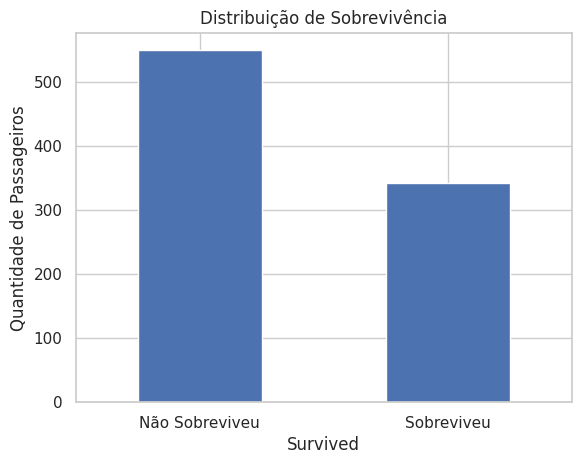

In [133]:
import matplotlib.pyplot as plt

df["Survived"].value_counts().plot(kind="bar")
plt.title("Distribuição de Sobrevivência")
plt.xticks([0,1], ["Não Sobreviveu", "Sobreviveu"], rotation=0)
plt.ylabel("Quantidade de Passageiros")

plt.show()

In [134]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

O sexo foi um dos fatores mais determinantes para a sobrevivência. Mulheres apresentaram uma taxa de sobrevivência aproximadamente quatro vezes maior que a dos homens, evidenciando um forte viés de priorização no resgate.


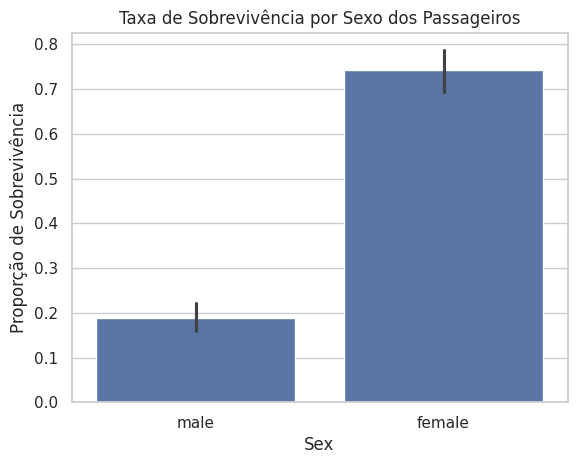

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex",y="Survived",data=df)
plt.title("Taxa de Sobrevivência por Sexo dos Passageiros")
plt.ylabel("Proporção de Sobrevivência")

plt.show()

In [136]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Passageiros da 1ª classe apresentaram taxa de sobrevivência significativamente superior à dos passageiros da 3ª classe, indicando que a posição socioeconômica foi um fator relevante durante o processo de evacuação.


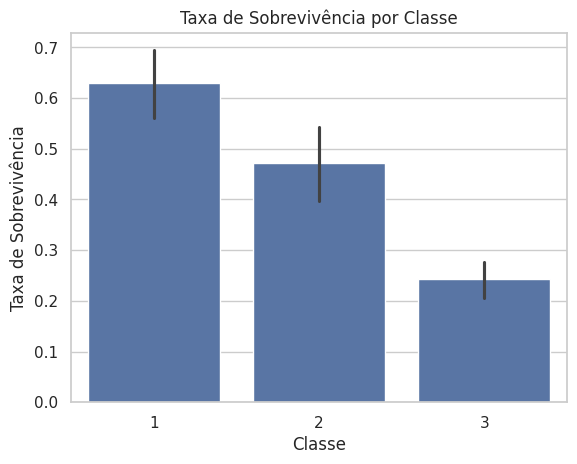

In [137]:
sns.barplot(x="Pclass",y="Survived",data=df)
plt.title("Taxa de Sobrevivência por Classe")
plt.ylabel("Taxa de Sobrevivência")
plt.xlabel("Classe")

plt.show()

In [138]:
df.groupby(["Sex","Pclass"])["Survived"].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

A análise cruzada entre sexo e classe revelou que mulheres da 1ª classe apresentaram taxa de sobrevivência próxima de 96%, enquanto homens da 3ª classe apresentaram taxa inferior a 15%. Esse resultado evidencia que tanto o gênero quanto a posição socioeconômica exerceram influência significativa sobre as chances de sobrevivência.


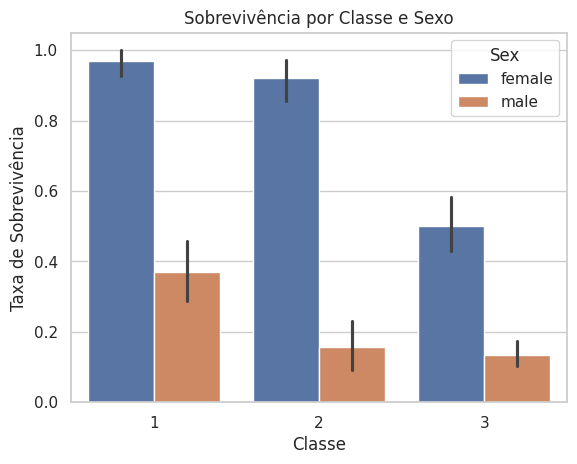

In [139]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=df)
plt.title("Sobrevivência por Classe e Sexo")
plt.ylabel("Taxa de Sobrevivência")
plt.xlabel("Classe")

plt.show()

In [140]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

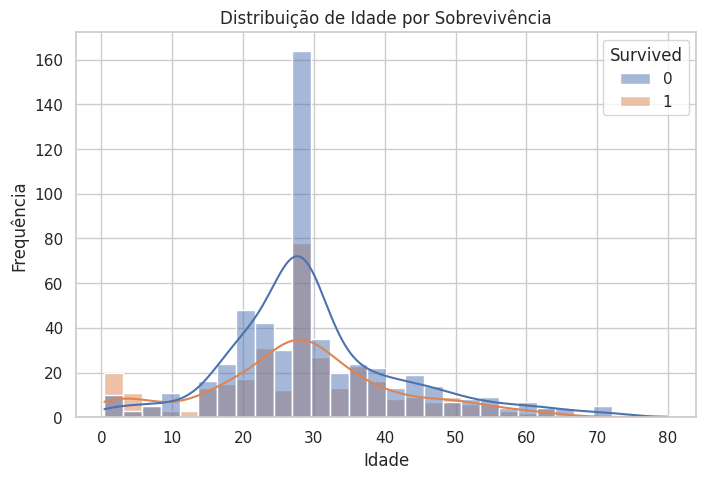

In [141]:
plt.figure(figsize=(8,5))

sns.histplot(data=df,x="Age",hue="Survived",bins=30,kde=True)

plt.title("Distribuição de Idade por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Frequência")

plt.show()

A análise da distribuição etária indicou que a maioria dos passageiros concentrava-se entre 15 e 50 anos, com pico próximo aos 28–30 anos. Embora a média de idade entre sobreviventes seja semelhante à dos não sobreviventes, observa-se maior presença proporcional de crianças entre os sobreviventes, sugerindo possível priorização de evacuação para menores.


In [142]:
# Criando variável categórica

df["Faixa_Etaria"] = df["Age"].apply(lambda x: "Criança" if x < 12 else "Adulto")
df.groupby("Faixa_Etaria")["Survived"].mean()


Faixa_Etaria
Adulto     0.368165
Criança    0.573529
Name: Survived, dtype: float64

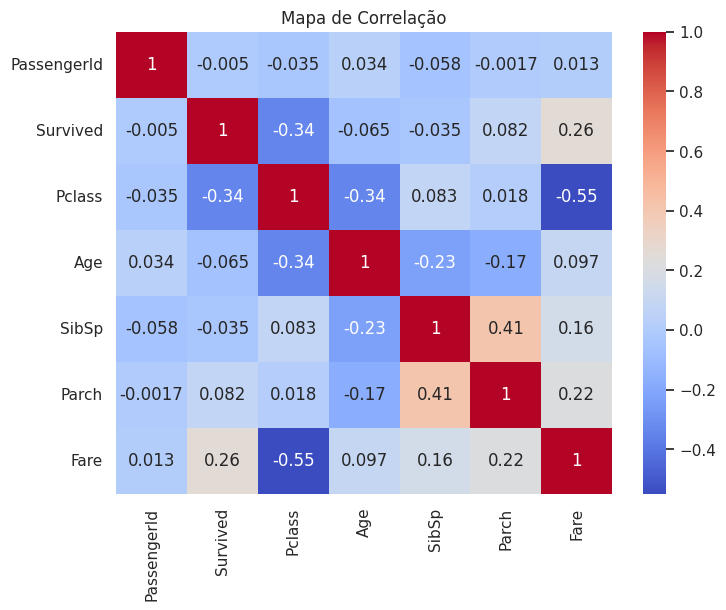

In [143]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Mapa de Correlação")

plt.show()

## Interpretação do Mapa de Correlação

A análise de correlação indica que a variável Pclass apresenta correlação negativa moderada com a sobrevivência (-0,34), sugerindo que passageiros de classes inferiores tiveram menor probabilidade de sobreviver. 

A variável Fare apresenta correlação positiva moderada (0,26), indicando que passageiros que pagaram tarifas mais altas tiveram maiores chances de sobrevivência, reforçando a influência da posição socioeconômica.

Já a variável Age apresentou correlação muito fraca (-0,06), indicando que a idade, isoladamente, não foi um fator determinante na sobrevivência.

Esses resultados sugerem que fatores estruturais, como classe social e poder econômico, tiveram impacto mais significativo do que a idade no desfecho do evento.


## Conclusão Geral

A análise exploratória do dataset do Titanic permitiu identificar padrões relevantes associados à sobrevivência dos passageiros.

Observou-se que o sexo foi o fator mais determinante, com mulheres apresentando taxa de sobrevivência significativamente superior à dos homens. A classe social também demonstrou forte influência, sendo que passageiros da 1ª classe apresentaram probabilidade de sobrevivência muito maior do que os da 3ª classe.

A análise cruzada entre sexo e classe evidenciou que mulheres da 1ª classe tiveram as maiores taxas de sobrevivência, enquanto homens da 3ª classe apresentaram as menores.

A idade, analisada isoladamente, apresentou correlação fraca com a sobrevivência. Entretanto, ao categorizar crianças e adultos, verificou-se que crianças tiveram probabilidade superior de sobrevivência, indicando possível prioridade de evacuação.

O mapa de correlação confirmou que variáveis associadas à condição socioeconômica (classe e tarifa paga) tiveram impacto mais relevante do que a idade no desfecho observado.

Conclui-se que a sobrevivência no Titanic foi fortemente influenciada por fatores estruturais como gênero e posição socioeconômica.